# Regression Week 3: Assessing Fit (polynomial regression)

In this notebook you will compare different regression models in order to assess which model fits best. We will be using polynomial regression as a means to examine this topic. In particular you will:
* Write a function to take an array and a degree and return an data frame where each column is the array / series to a polynomial value up to the total degree e.g. degree = 3 then column 1 is the series column 2 is the series squared and column 3 is the series cubed
* Visualize polynomial regressions
* Visualize the same polynomial degree on different subsets of the data
* Use a validation set to select a polynomial degree
* Assess the final fit using test data

We will continue to use the House data from previous notebooks, however the data has been split already in `train`, `test` and `validation` sets to avoid the in compatibility between graphlab random split and other methods.

## Constants

In [50]:
# import graphlab
import pandas as pd
import numpy as np
import math
import matplotlib
import seaborn as sns
import bokeh
from sklearn import linear_model as lm
from sklearn import datasets
% matplotlib inline

Since the original quiz questions and solution are based of `graphlab`, it is prudent to make sure tha the data types are same when read using some other library (`pandas` in this case).

In [51]:
dtype_dict = {'bathrooms':float, 
              'waterfront':int, 
              'sqft_above':int, 
              'sqft_living15':float, 
              'grade':int, 
              'yr_renovated':int, 
              'price':float, 
              'bedrooms':float, 
              'zipcode':str, 
              'long':float, 
              'sqft_lot15':float, 
              'sqft_living':float, 
              'floors':str, 
              'condition':int, 
              'lat':float, 
              'date':str, 
              'sqft_basement':int, 
              'yr_built':int, 
              'id':str, 
              'sqft_lot':int, 
              'view':int}

Next we're going to write a polynomial function that takes an array and a maximal degree and returns an data frame with columns containing the array as a series to all the powers up to the maximal degree.

In [52]:
tmp = pd.Series([1., 2.0, 3.0])
tmp_cubed = tmp ** 3
print tmp
print tmp_cubed

0    1.0
1    2.0
2    3.0
dtype: float64
0     1.0
1     8.0
2    27.0
dtype: float64


## Polynomial function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [53]:
def polynomial_dframe(feature, degree): # assume that degree >= 1
    # creating empty list for use later
    col_names = ["power_1"]
    poly_series = feature
    poly_df = poly_series
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        # range usually starts at 0 and stops at the endpoint-1. We want it to start at 2 and stop at degree
        for power in range(2, degree+1): 
            # first we'll create the column a name:
            name = 'power_' + str(power)
            col_names.append(name)
            
            # then derive the values for the power of feature and concatenate it to the df
            temp = poly_series ** power
            poly_df = pd.concat([poly_df, temp], axis = 1)
        
        poly_df.columns = col_names

    return poly_df

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [54]:
print polynomial_dframe(tmp, 1)

0    1.0
1    2.0
2    3.0
dtype: float64


## Visualizing polynomial regression

Let's visualize what a polynomial regression looks like on some real data.

### Get Data

In [55]:
sales = pd.read_csv("./data/kc_house_data.csv")
training_data = pd.read_csv("./data/wk3_kc_house_train_data.csv")
test_data = pd.read_csv("./data/wk3_kc_house_test_data.csv")
validation_data = pd.read_csv("./data/wk3_kc_house_valid_data.csv")

As in Week 3, we will use the `sqft_living` variable. For plotting purposes (connecting the dots), you'll need to sort by the values of `sqft_living`. For houses with identical square footage, we break the tie by their prices.

In [56]:
sales = sales.sort_values(['sqft_living', 'price'])

Let's start with a degree 1 polynomial using `sqft_living` (i.e. a line) to predict `price` and plot what it looks like. 

In [57]:
poly1_data = polynomial_dframe(sales['sqft_living'], 1)
poly1_data = pd.concat([poly1_data,sales['price']], axis=1) # add price to the data since it's the target

In [58]:
poly1_data.columns

Index([u'sqft_living', u'price'], dtype='object')

NOTE: for all the models in this notebook use validation_set = None to ensure that all results are consistent across users.

In [59]:
# model1 = graphlab.linear_regression.create(poly1_data, target = 'price', features = ['power_1'], validation_set = None)
data = np.asarray(poly1_data)
X = data[:,0].reshape(-1,1)
y = data[:,1].reshape(-1,1)

In [60]:
regr = lm.LinearRegression()
model1 = regr.fit(X, y)

In [61]:
#let's take a look at the weights before we plot
model1.score(X, y)

0.49285321790379316

In [62]:
import matplotlib.pyplot as plt
%matplotlib inline

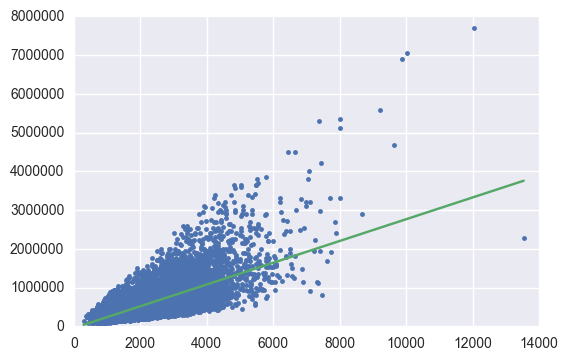

In [63]:
plt.plot(poly1_data['sqft_living'],poly1_data['price'],'.',
        poly1_data['sqft_living'], model1.predict(X),'-')

Let's unpack that plt.plot() command. The first pair of array we passed are the 1st power of sqft and the actual price we then ask it to print these as dots '.'. The next pair we pass is the 1st power of sqft and the predicted values from the linear model. We ask these to be plotted as a line '-'. 

We can see, not surprisingly, that the predicted values all fall on a line, specifically the one with slope 280 and intercept -43579. What if we wanted to plot a second degree polynomial?

In [64]:
poly2_data = polynomial_dframe(sales['sqft_living'], 2)
# my_features = poly2_data.column_names() # get the name of the features
poly2_data['price'] = sales['price'] # add price to the data since it's the target
# model2 = graphlab.linear_regression.create(poly2_data, target = 'price', features = my_features, validation_set = None)

In [65]:
poly2_data.columns

Index([u'power_1', u'power_2', u'price'], dtype='object')

In [66]:
X2 = poly2_data[['power_1', 'power_2']]

In [67]:
model2 = regr.fit(X2, y)
model2.score(X2,y)

0.53274309405914422

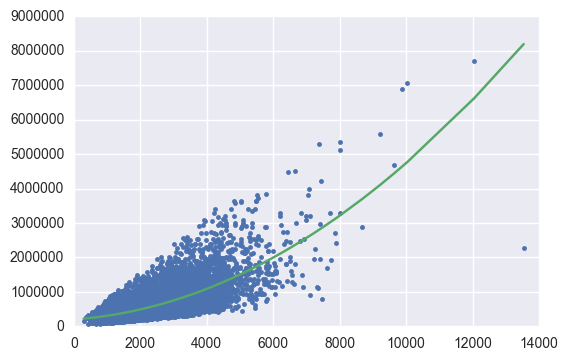

In [68]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(X2),'-')

The resulting model looks like half a parabola. Try on your own to see what the cubic looks like:

In [69]:
poly3_data = polynomial_dframe(sales['sqft_living'], 3)
poly3_data['price'] = sales['price'] # add price to the data since it's the target

In [70]:
X3 = poly3_data[['power_1', 'power_2', 'power_3']]

In [71]:
model3 = regr.fit(X3, y)
model3.score(X3,y)

0.53900455105031986

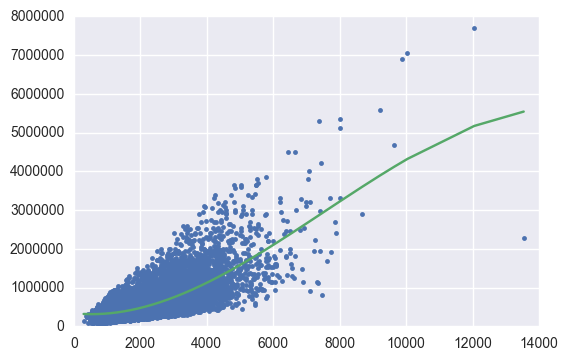

In [72]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(X3),'-')

Now try a 15th degree polynomial:

In [73]:
poly15_data = polynomial_dframe(sales['sqft_living'], 15)
poly15_data['price'] = sales['price'] # add price to the data since it's the target

In [74]:
X15 = poly15_data.iloc[:, 0:15]

In [75]:
model15 = regr.fit(X15, y)
model15.score(X15,y)

0.54100155747340384

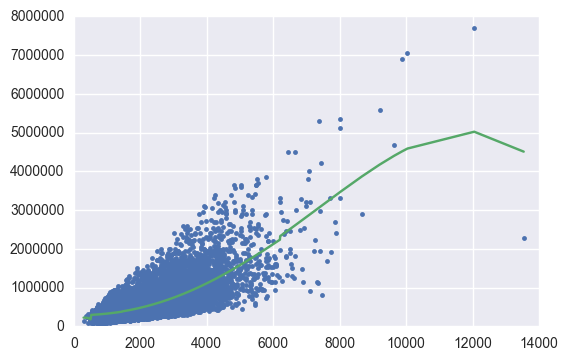

In [76]:
plt.plot(poly2_data['power_1'],poly2_data['price'],'.',
        poly2_data['power_1'], model2.predict(X15),'-')

What do you think of the 15th degree polynomial? Do you think this is appropriate? If we were to change the data do you think you'd get pretty much the same curve? Let's take a look.

## Changing the data and re-learning

We're going to split the sales data into four subsets of roughly equal size. Then you will estimate a 15th degree polynomial model on all four subsets of the data. Print the coefficients (you should use .print_rows(num_rows = 16) to view all of them) and plot the resulting fit (as we did above). The quiz will ask you some questions about these results.

To split the sales data into four subsets, we perform the following steps:
* First split sales into 2 subsets with `.random_split(0.5, seed=0)`. 
* Next split the resulting subsets into 2 more subsets each. Use `.random_split(0.5, seed=0)`.

We set `seed=0` in these steps so that different users get consistent results.
You should end up with 4 subsets (`set_1`, `set_2`, `set_3`, `set_4`) of approximately equal size. 

Fit a 15th degree polynomial on set_1, set_2, set_3, and set_4 using sqft_living to predict prices. Print the coefficients and make a plot of the resulting model.

### Quiz Question 1: 
Is the sign (positive or negative) for power_15 the same in all four models?

### Quiz Question 2: 
(True/False) the plotted fitted lines look the same in all four plots

## Selecting a Polynomial Degree

Whenever we have a "magic" parameter like the degree of the polynomial there is one well-known way to select these parameters: validation set. (We will explore another approach in week 4).

We split the sales dataset 3-way into training set, test set, and validation set as follows:

* Split our sales data into 2 sets: `training_and_validation` and `testing`. Use `random_split(0.9, seed=1)`.
* Further split our training data into two sets: `training` and `validation`. Use `random_split(0.5, seed=1)`.

Again, we set `seed=1` to obtain consistent results for different users.

Next you should write a loop that does the following:
* For degree in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15] (to get this in python type range(1, 15+1))
    * Build an SFrame of polynomial data of train_data['sqft_living'] at the current degree
    * hint: my_features = poly_data.column_names() gives you a list e.g. ['power_1', 'power_2', 'power_3'] which you might find useful for graphlab.linear_regression.create( features = my_features)
    * Add train_data['price'] to the polynomial SFrame
    * Learn a polynomial regression model to sqft vs price with that degree on TRAIN data
    * Compute the RSS on VALIDATION data (here you will want to use .predict()) for that degree and you will need to make a polynmial SFrame using validation data.
* Report which degree had the lowest RSS on validation data (remember python indexes from 0)

(Note you can turn off the print out of linear_regression.create() with verbose = False)

## Quiz Question 3: 
Which degree (1, 2, …, 15) had the lowest RSS on Validation data?

Now that you have chosen the degree of your polynomial using validation data, compute the RSS of this model on TEST data. Report the RSS on your quiz.

## Quiz Question 4:
What is the RSS on TEST data for the model with the degree selected from Validation data?